In [7]:
import json
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from RL_QAOA import *

In [2]:
# Save the matrices to a JSON file
with open("matrices5by5.json", "r") as f:
    matrices_data = json.load(f)

In [3]:
qubo = np.array(matrices_data[6]) * 30
penalty_term = 5
hamming_weight = 3

In [4]:
for i in range(qubo.shape[0]):
    qubo[i, i] += penalty_term * (1 - 2 * hamming_weight)  # Hamming weight 페널티 적용
    for j in range(i + 1, qubo.shape[0]):
        qubo[i, j] += penalty_term
        qubo[j, i] += penalty_term  # 대칭성 유지

In [11]:
qubo

array([[-23.024524  ,   5.81090817,   6.92026282,   6.74480316,
          4.2544014 ],
       [  5.81090817, -23.5472973 ,   5.810902  ,   5.6006006 ,
          4.54932699],
       [  6.92026282,   5.810902  , -23.10394464,   6.60620134,
          4.24963681],
       [  6.74480316,   5.6006006 ,   6.60620134, -23.01468135,
          4.28903212],
       [  4.2544014 ,   4.54932699,   4.24963681,   4.28903212,
        -22.5961397 ]])

In [8]:
# RL-QAOA setup
n=qubo.shape[0]
n_c=2
depth=1
init_params = np.random.uniform(0, 0.3, 2 * depth * (n - n_c))

rl_qaoa_rand = RL_QAOA(
    qubo,
    n,
    init_params,
    b_vector=np.array([[25.0] * int((n**2)) for i in range(n - n_c)]),
    QAOA_depth=depth,
    gamma=0.99,
    learning_rate_init=[0.05, 0.02],
)
final_config = rl_qaoa_rand.rqaoa_execute()
rl_qaoa_rand.n_c = n_c
print(
    f"classical_result : {float(final_config[2])},best : {rl_qaoa_rand.node_assignments}"
)
# Execute RQAOA
final_config = rl_qaoa_rand.RL_QAOA(
    episodes=50, epochs=500, correct_ans=float(final_config[2])
)

classical_result : -54.486890374578365,best : [-1, 1, 1, 1, 1]


Epoch 1/500: 100%|██████████| 50/50 [00:01<00:00, 42.60 episode/s]


  Probability of finding correct solution: 0.0400
  Average reward: -49.423832144531
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 6/500: 100%|██████████| 50/50 [00:01<00:00, 43.52 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -44.7213094386726
  Lowest reward obtained: -52.547622339753865
  Best state at lowest value: [ 1  1  1 -1  1]


Epoch 11/500: 100%|██████████| 50/50 [00:01<00:00, 29.77 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -47.21974809476979
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 16/500: 100%|██████████| 50/50 [00:01<00:00, 33.45 episode/s]


  Probability of finding correct solution: 0.0400
  Average reward: -45.46581971863887
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 21/500: 100%|██████████| 50/50 [00:01<00:00, 29.64 episode/s]


  Probability of finding correct solution: 0.0400
  Average reward: -47.03551781387579
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 26/500: 100%|██████████| 50/50 [00:01<00:00, 33.25 episode/s]


  Probability of finding correct solution: 0.0400
  Average reward: -47.72409575227578
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 31/500: 100%|██████████| 50/50 [00:01<00:00, 30.33 episode/s]


  Probability of finding correct solution: 0.0600
  Average reward: -48.17469261827192
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 36/500: 100%|██████████| 50/50 [00:01<00:00, 28.23 episode/s]


  Probability of finding correct solution: 0.1000
  Average reward: -48.19076845663617
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 41/500: 100%|██████████| 50/50 [00:01<00:00, 26.97 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -47.78188062201074
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 46/500: 100%|██████████| 50/50 [00:01<00:00, 29.74 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -48.462819078951654
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 51/500: 100%|██████████| 50/50 [00:01<00:00, 26.55 episode/s]


  Probability of finding correct solution: 0.0600
  Average reward: -49.07727536622201
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 56/500: 100%|██████████| 50/50 [00:01<00:00, 27.32 episode/s]


  Probability of finding correct solution: 0.0600
  Average reward: -47.78334832888068
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 61/500: 100%|██████████| 50/50 [00:01<00:00, 29.31 episode/s]


  Probability of finding correct solution: 0.2200
  Average reward: -49.066889581639
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 66/500: 100%|██████████| 50/50 [00:01<00:00, 30.37 episode/s]


  Probability of finding correct solution: 0.1600
  Average reward: -50.34324986742499
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 71/500: 100%|██████████| 50/50 [00:01<00:00, 33.01 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -49.48884678414089
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 76/500: 100%|██████████| 50/50 [00:01<00:00, 35.40 episode/s]


  Probability of finding correct solution: 0.2600
  Average reward: -51.20532826344555
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 81/500: 100%|██████████| 50/50 [00:01<00:00, 37.04 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -47.62079881407951
  Lowest reward obtained: -52.547622339753865
  Best state at lowest value: [ 1  1  1 -1  1]


Epoch 86/500: 100%|██████████| 50/50 [00:01<00:00, 39.37 episode/s]


  Probability of finding correct solution: 0.1400
  Average reward: -50.644989910479254
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 91/500: 100%|██████████| 50/50 [00:01<00:00, 36.95 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -47.821367416122
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 96/500: 100%|██████████| 50/50 [00:01<00:00, 34.15 episode/s]


  Probability of finding correct solution: 0.2400
  Average reward: -50.144384020487976
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 101/500: 100%|██████████| 50/50 [00:01<00:00, 37.45 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -49.44023181533428
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 106/500: 100%|██████████| 50/50 [00:01<00:00, 34.75 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -47.001629800465714
  Lowest reward obtained: -52.547622339753865
  Best state at lowest value: [ 1  1  1 -1  1]


Epoch 111/500: 100%|██████████| 50/50 [00:00<00:00, 64.60 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -51.64836270573318
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 116/500: 100%|██████████| 50/50 [00:01<00:00, 34.87 episode/s]


  Probability of finding correct solution: 0.1400
  Average reward: -48.99945077334272
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 121/500: 100%|██████████| 50/50 [00:01<00:00, 45.94 episode/s]


  Probability of finding correct solution: 0.2000
  Average reward: -46.47767820127914
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 126/500: 100%|██████████| 50/50 [00:01<00:00, 46.49 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -48.13231559655814
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 131/500: 100%|██████████| 50/50 [00:00<00:00, 60.97 episode/s]


  Probability of finding correct solution: 0.3000
  Average reward: -48.58339505979023
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 136/500: 100%|██████████| 50/50 [00:01<00:00, 41.98 episode/s]


  Probability of finding correct solution: 0.1000
  Average reward: -50.396452903228294
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 141/500: 100%|██████████| 50/50 [00:00<00:00, 52.60 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -46.605147453980436
  Lowest reward obtained: -52.547622339753865
  Best state at lowest value: [ 1  1  1 -1  1]


Epoch 146/500: 100%|██████████| 50/50 [00:00<00:00, 63.23 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -47.094574890421136
  Lowest reward obtained: -53.75455877348792
  Best state at lowest value: [ 1  1 -1  1  1]


Epoch 151/500: 100%|██████████| 50/50 [00:01<00:00, 47.89 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -46.56746089515374
  Lowest reward obtained: -52.547622339753865
  Best state at lowest value: [ 1  1  1 -1  1]


Epoch 156/500: 100%|██████████| 50/50 [00:01<00:00, 35.21 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -40.90126660855893
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 161/500: 100%|██████████| 50/50 [00:01<00:00, 36.52 episode/s]


  Probability of finding correct solution: 0.2400
  Average reward: -49.37317027705035
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 166/500: 100%|██████████| 50/50 [00:00<00:00, 52.39 episode/s]


  Probability of finding correct solution: 0.1000
  Average reward: -50.945842874688225
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 171/500: 100%|██████████| 50/50 [00:01<00:00, 44.72 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -50.81580076923646
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 176/500: 100%|██████████| 50/50 [00:00<00:00, 53.88 episode/s]


  Probability of finding correct solution: 0.2000
  Average reward: -53.22514069081493
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 181/500: 100%|██████████| 50/50 [00:01<00:00, 41.85 episode/s]


  Probability of finding correct solution: 0.2000
  Average reward: -52.09794048473968
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 186/500: 100%|██████████| 50/50 [00:01<00:00, 28.64 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -47.96395842866475
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 191/500: 100%|██████████| 50/50 [00:01<00:00, 31.89 episode/s]


  Probability of finding correct solution: 0.1200
  Average reward: -48.50468406669772
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 196/500: 100%|██████████| 50/50 [00:01<00:00, 31.53 episode/s]


  Probability of finding correct solution: 0.5600
  Average reward: -52.48008285183865
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 201/500: 100%|██████████| 50/50 [00:01<00:00, 32.40 episode/s]


  Probability of finding correct solution: 0.1600
  Average reward: -50.24144753756323
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 206/500: 100%|██████████| 50/50 [00:01<00:00, 36.60 episode/s]


  Probability of finding correct solution: 0.1200
  Average reward: -49.44084986134791
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 211/500: 100%|██████████| 50/50 [00:01<00:00, 29.13 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -50.6626216753267
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 216/500: 100%|██████████| 50/50 [00:01<00:00, 38.93 episode/s]


  Probability of finding correct solution: 0.1600
  Average reward: -51.9029666230996
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 221/500: 100%|██████████| 50/50 [00:01<00:00, 49.38 episode/s]


  Probability of finding correct solution: 0.2600
  Average reward: -50.57190055874996
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 226/500: 100%|██████████| 50/50 [00:01<00:00, 46.93 episode/s]


  Probability of finding correct solution: 0.4200
  Average reward: -49.766822321046654
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 231/500: 100%|██████████| 50/50 [00:00<00:00, 57.39 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -49.877751399787236
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 236/500: 100%|██████████| 50/50 [00:01<00:00, 41.55 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -46.250629958543804
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 241/500: 100%|██████████| 50/50 [00:01<00:00, 49.53 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -48.59613951052631
  Lowest reward obtained: -52.547622339753865
  Best state at lowest value: [ 1  1  1 -1  1]


Epoch 246/500: 100%|██████████| 50/50 [00:01<00:00, 49.31 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -46.98365635748185
  Lowest reward obtained: -53.75455877348792
  Best state at lowest value: [ 1  1 -1  1  1]


Epoch 251/500: 100%|██████████| 50/50 [00:00<00:00, 66.27 episode/s]


  Probability of finding correct solution: 0.1800
  Average reward: -50.90078042738767
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 256/500: 100%|██████████| 50/50 [00:00<00:00, 58.64 episode/s]


  Probability of finding correct solution: 0.2000
  Average reward: -51.83241711613573
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 261/500: 100%|██████████| 50/50 [00:00<00:00, 66.10 episode/s]


  Probability of finding correct solution: 0.0600
  Average reward: -49.4541713794936
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 266/500: 100%|██████████| 50/50 [00:01<00:00, 43.23 episode/s]


  Probability of finding correct solution: 0.3200
  Average reward: -50.538903205715336
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 271/500: 100%|██████████| 50/50 [00:00<00:00, 53.06 episode/s]


  Probability of finding correct solution: 0.2400
  Average reward: -50.981311992622
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 276/500: 100%|██████████| 50/50 [00:00<00:00, 56.72 episode/s]


  Probability of finding correct solution: 0.1800
  Average reward: -50.549453293290725
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 281/500: 100%|██████████| 50/50 [00:00<00:00, 64.75 episode/s]


  Probability of finding correct solution: 0.0600
  Average reward: -50.619768246163886
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 286/500: 100%|██████████| 50/50 [00:00<00:00, 61.21 episode/s]


  Probability of finding correct solution: 0.2200
  Average reward: -50.02153449471634
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 291/500: 100%|██████████| 50/50 [00:00<00:00, 56.61 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -51.69561891463596
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 296/500: 100%|██████████| 50/50 [00:00<00:00, 57.98 episode/s]


  Probability of finding correct solution: 0.2200
  Average reward: -52.93780961060416
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 301/500: 100%|██████████| 50/50 [00:00<00:00, 62.85 episode/s]


  Probability of finding correct solution: 0.1400
  Average reward: -52.50009888004499
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 306/500: 100%|██████████| 50/50 [00:00<00:00, 68.00 episode/s]


  Probability of finding correct solution: 0.2600
  Average reward: -53.36800065368674
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 311/500: 100%|██████████| 50/50 [00:00<00:00, 54.99 episode/s]


  Probability of finding correct solution: 0.3000
  Average reward: -53.44557137507972
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 316/500: 100%|██████████| 50/50 [00:00<00:00, 61.45 episode/s]


  Probability of finding correct solution: 0.4800
  Average reward: -53.86469065526451
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 321/500: 100%|██████████| 50/50 [00:00<00:00, 63.96 episode/s]


  Probability of finding correct solution: 0.4000
  Average reward: -53.73368794115325
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 326/500: 100%|██████████| 50/50 [00:00<00:00, 62.00 episode/s]


  Probability of finding correct solution: 0.3400
  Average reward: -53.4392614343338
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 331/500: 100%|██████████| 50/50 [00:00<00:00, 65.17 episode/s]


  Probability of finding correct solution: 0.4000
  Average reward: -53.5595523337654
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 336/500: 100%|██████████| 50/50 [00:00<00:00, 69.76 episode/s]


  Probability of finding correct solution: 0.2600
  Average reward: -51.02348701082493
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 341/500: 100%|██████████| 50/50 [00:00<00:00, 70.96 episode/s]


  Probability of finding correct solution: 0.4600
  Average reward: -52.0123242790099
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 346/500: 100%|██████████| 50/50 [00:00<00:00, 70.33 episode/s]


  Probability of finding correct solution: 0.0600
  Average reward: -47.11962212395542
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 351/500: 100%|██████████| 50/50 [00:00<00:00, 70.83 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -33.95237311443666
  Lowest reward obtained: -47.461651271564634
  Best state at lowest value: [-1  1  1 -1  1]


Epoch 356/500: 100%|██████████| 50/50 [00:00<00:00, 70.74 episode/s]


  Probability of finding correct solution: 0.0600
  Average reward: -46.91562133731013
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 361/500: 100%|██████████| 50/50 [00:00<00:00, 64.93 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -50.59843711993154
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 366/500: 100%|██████████| 50/50 [00:01<00:00, 38.64 episode/s]


  Probability of finding correct solution: 0.4000
  Average reward: -53.12652141431396
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 371/500: 100%|██████████| 50/50 [00:01<00:00, 48.35 episode/s]


  Probability of finding correct solution: 0.3000
  Average reward: -53.24809252589038
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 376/500: 100%|██████████| 50/50 [00:01<00:00, 34.59 episode/s]


  Probability of finding correct solution: 0.1000
  Average reward: -49.93883486731206
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 381/500: 100%|██████████| 50/50 [00:01<00:00, 34.33 episode/s]


  Probability of finding correct solution: 0.2000
  Average reward: -49.61120179561294
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 386/500: 100%|██████████| 50/50 [00:01<00:00, 31.65 episode/s]


  Probability of finding correct solution: 0.3800
  Average reward: -50.953908189884174
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 391/500: 100%|██████████| 50/50 [00:01<00:00, 36.26 episode/s]


  Probability of finding correct solution: 0.2600
  Average reward: -51.19277238323729
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 396/500: 100%|██████████| 50/50 [00:01<00:00, 34.02 episode/s]


  Probability of finding correct solution: 0.0400
  Average reward: -48.29342159345711
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 401/500: 100%|██████████| 50/50 [00:01<00:00, 35.62 episode/s]


  Probability of finding correct solution: 0.3200
  Average reward: -51.04102235945245
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 406/500: 100%|██████████| 50/50 [00:01<00:00, 32.85 episode/s]


  Probability of finding correct solution: 0.2000
  Average reward: -52.03996625135974
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 411/500: 100%|██████████| 50/50 [00:01<00:00, 35.01 episode/s]


  Probability of finding correct solution: 0.2200
  Average reward: -51.977442719208184
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 416/500: 100%|██████████| 50/50 [00:01<00:00, 34.90 episode/s]


  Probability of finding correct solution: 0.3400
  Average reward: -51.93915167359414
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 421/500: 100%|██████████| 50/50 [00:01<00:00, 34.26 episode/s]


  Probability of finding correct solution: 0.1800
  Average reward: -52.27522625672179
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 426/500: 100%|██████████| 50/50 [00:01<00:00, 40.32 episode/s]


  Probability of finding correct solution: 0.1400
  Average reward: -50.061601598938616
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 431/500: 100%|██████████| 50/50 [00:01<00:00, 49.35 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -37.39061380808178
  Lowest reward obtained: -47.9919814610799
  Best state at lowest value: [-1 -1  1  1  1]


Epoch 436/500: 100%|██████████| 50/50 [00:01<00:00, 45.60 episode/s]


  Probability of finding correct solution: 0.2600
  Average reward: -51.271279936253634
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 441/500: 100%|██████████| 50/50 [00:01<00:00, 35.45 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -40.37063686991493
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 446/500: 100%|██████████| 50/50 [00:01<00:00, 42.57 episode/s]


  Probability of finding correct solution: 0.0800
  Average reward: -46.450720441406744
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 451/500: 100%|██████████| 50/50 [00:01<00:00, 35.64 episode/s]


  Probability of finding correct solution: 0.0000
  Average reward: -46.77266252368051
  Lowest reward obtained: -52.547622339753865
  Best state at lowest value: [ 1  1  1 -1  1]


Epoch 456/500: 100%|██████████| 50/50 [00:01<00:00, 35.68 episode/s]


  Probability of finding correct solution: 0.0200
  Average reward: -47.64623959295942
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 461/500: 100%|██████████| 50/50 [00:01<00:00, 32.46 episode/s]


  Probability of finding correct solution: 0.3600
  Average reward: -52.40675182299506
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 466/500: 100%|██████████| 50/50 [00:01<00:00, 36.92 episode/s]


  Probability of finding correct solution: 0.1000
  Average reward: -50.95364138427508
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 471/500: 100%|██████████| 50/50 [00:01<00:00, 35.51 episode/s]


  Probability of finding correct solution: 0.3600
  Average reward: -52.026075385732604
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 476/500: 100%|██████████| 50/50 [00:01<00:00, 36.24 episode/s]


  Probability of finding correct solution: 0.0400
  Average reward: -50.190967445488596
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 481/500: 100%|██████████| 50/50 [00:01<00:00, 34.83 episode/s]


  Probability of finding correct solution: 0.4200
  Average reward: -52.59726566088158
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 486/500: 100%|██████████| 50/50 [00:01<00:00, 37.02 episode/s]


  Probability of finding correct solution: 0.5200
  Average reward: -52.76435796870413
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 491/500: 100%|██████████| 50/50 [00:01<00:00, 38.52 episode/s]


  Probability of finding correct solution: 0.6000
  Average reward: -52.69016034200688
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 496/500: 100%|██████████| 50/50 [00:00<00:00, 58.81 episode/s]


  Probability of finding correct solution: 0.6800
  Average reward: -53.719384667212324
  Lowest reward obtained: -54.486890374578365
  Best state at lowest value: [-1  1  1  1  1]


Epoch 500/500: 100%|██████████| 50/50 [00:00<00:00, 57.96 episode/s]


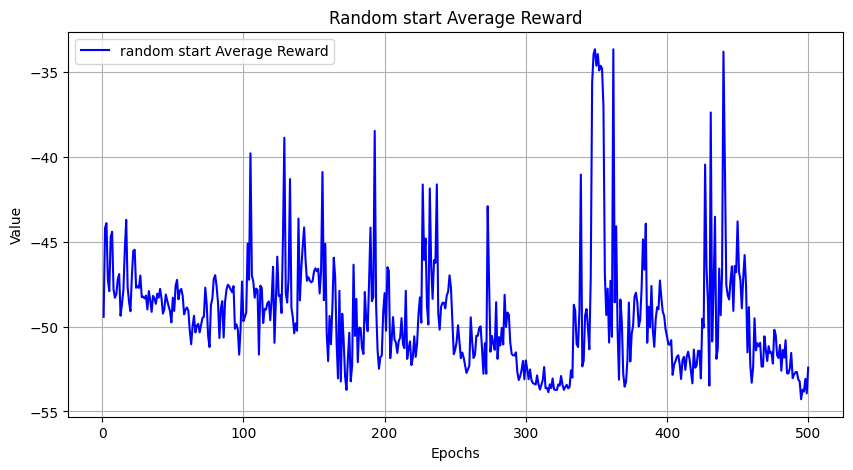

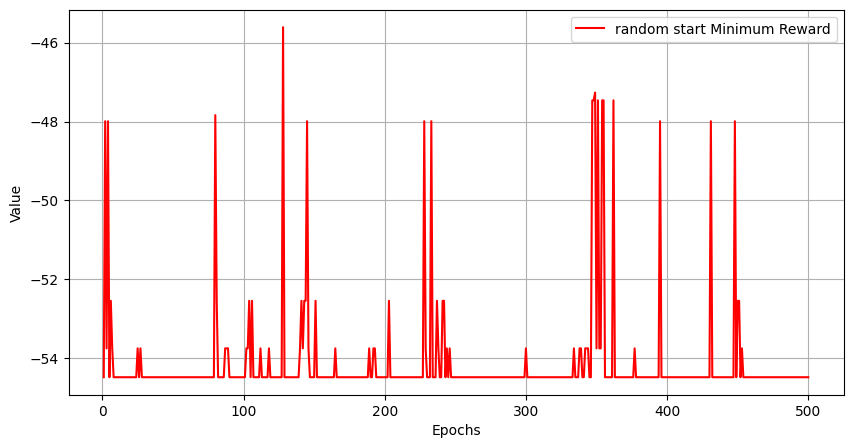

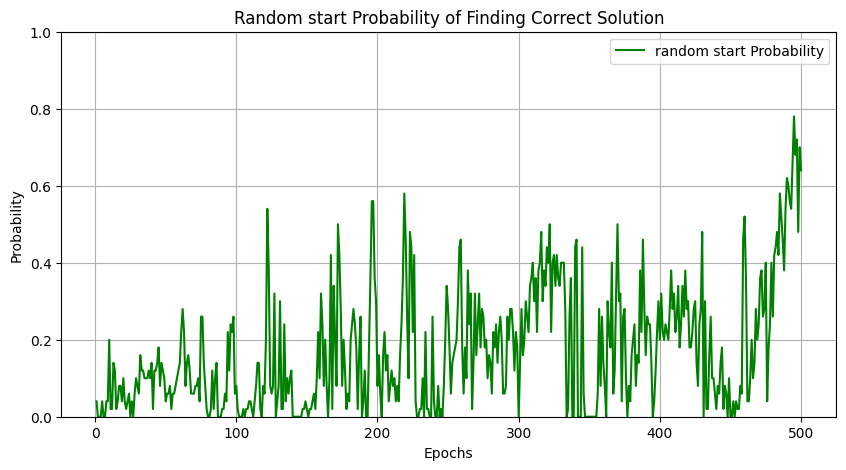

In [10]:
def plot_rl_qaoa_results(avg_values, min_values, prob_values):
    """
    Plots the stored training values of RL_QAOA across epochs with margin.

    - The first plot shows the average values over epochs with margin.
    - The second plot displays the minimum values over epochs with margin.
    - The third plot represents the probability of finding the correct solution.

    Parameters
    ----------
    avg_values : list
        List of average values over epochs.
    min_values : list
        List of minimum values over epochs.
    prob_values : list
        List of probabilities over epochs.

    The x-axis represents the number of epochs in all graphs.
    """

    epochs = range(1, len(avg_values) + 1)

    # Calculate margins for y-axis limits
    avg_min, avg_max = min(avg_values), max(avg_values)
    min_min, min_max = min(min_values), max(min_values)

    avg_margin = (avg_max - avg_min) * 0.05
    min_margin = (min_max - min_min) * 0.05

    # Plot average values with margin
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, avg_values, label="random start Average Reward", color="blue")
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("Random start Average Reward")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot minimum values with margin
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, min_values, label="random start Minimum Reward", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot probability values
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, prob_values, label="random start Probability", color="green")
    plt.xlabel("Epochs")
    plt.ylabel("Probability")
    plt.title("Random start Probability of Finding Correct Solution")
    plt.ylim(0, 1)  # Setting the y-axis range between 0 and 1
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage with dummy data
avg_values_random = rl_qaoa_rand.avg_values
min_values_random = rl_qaoa_rand.min_values
prob_values_random = rl_qaoa_rand.prob_values
plot_rl_qaoa_results(
    rl_qaoa_rand.avg_values, rl_qaoa_rand.min_values, rl_qaoa_rand.prob_values
)